In [1]:
# 1. Explain the concept of forward propagation in a neural network.

import numpy as np

# Define activation function (ReLU)
def relu(x):
    return np.maximum(0, x)

# Input data (1 sample, 3 features)
X = np.array([[0.5, 0.2, 0.1]])

# Weights and biases for the hidden layer (3 neurons)
W1 = np.array([[0.2, 0.8, -0.5],
               [0.7, -0.3, 0.1],
               [0.5, 0.1, 0.6]])

b1 = np.array([[0.1, 0.2, -0.1]])

# Weights and biases for the output layer (1 neuron)
W2 = np.array([[0.5],
               [-0.6],
               [0.7]])

b2 = np.array([[0.05]])

# Forward propagation
Z1 = np.dot(X, W1) + b1  # Linear transformation
A1 = relu(Z1)  # Activation function

Z2 = np.dot(A1, W2) + b2  # Linear transformation
A2 = Z2  # Output (no activation, assuming regression)

print("Final Output:", A2)


Final Output: [[-0.085]]


**Forward Propagation in a Neural Network**
Forward propagation is the process by which input data is passed through a neural network to produce an output. It involves a series of mathematical operations, including matrix multiplications and activation functions, to transform the input into a prediction.

**Steps of Forward Propagation:**

1. Input Layer: The input data is fed into the network.

2. Weighted Sum: Each input is multiplied by its corresponding weight, and a bias term is added.

3. Activation Function: The weighted sum is passed through an activation function to introduce non-linearity.

4. Hidden Layers: The process is repeated for each hidden layer until the output layer is reached.

5. Output Layer: The final transformation produces the network's output.


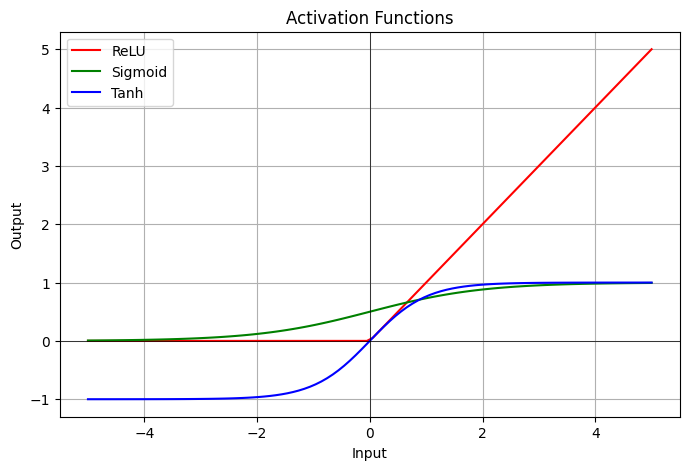

In [2]:
# 2. What is the purpose of the activation function in forward propagation?

import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Input values
x = np.linspace(-5, 5, 100)

# Compute activation values
relu_values = relu(x)
sigmoid_values = sigmoid(x)
tanh_values = tanh(x)

# Plot activation functions
plt.figure(figsize=(8, 5))
plt.plot(x, relu_values, label="ReLU", color='r')
plt.plot(x, sigmoid_values, label="Sigmoid", color='g')
plt.plot(x, tanh_values, label="Tanh", color='b')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()


**Purpose of the Activation Function in Forward Propagation**

The activation function in a neural network introduces non-linearity, allowing the network to learn complex patterns and relationships in the data. Without activation functions, a neural network would behave like a simple linear model, regardless of the number of layers.

**Key Roles of Activation Functions:**

1. Non-Linearity: Enables the network to capture complex patterns beyond simple linear relationships.

2. Feature Extraction: Helps neurons activate only for relevant inputs, improving learning.

3. Gradient Flow: Allows efficient backpropagation by controlling gradient values.

4. Output Transformation: Ensures outputs are in the required range, like (0,1) for probabilities in classification.

In [4]:
# 3. Describe the steps involved in the backward propagation (backpropagation) algorithm.

import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid function

# Input data (2 samples, 2 features)
X = np.array([[0.1, 0.2],
              [0.4, 0.6]])

# Target output
Y = np.array([[0.3],
              [0.7]])

# Initialize weights and bias randomly
np.random.seed(0)
W = np.random.rand(2, 1)  # 2 input neurons, 1 output neuron
b = np.random.rand(1)

# Learning rate
lr = 0.1

# Training iterations
epochs = 1000

for epoch in range(epochs):
    # Forward Propagation
    Z = np.dot(X, W) + b  # Linear transformation
    A = sigmoid(Z)  # Activation function

    # Compute loss (Mean Squared Error)
    loss = np.mean((Y - A) ** 2)

    # Backward Propagation
    dA = 2 * (A - Y) / Y.shape[0]  # Derivative of loss w.r.t A
    dZ = dA * sigmoid_derivative(A)  # Chain rule: dL/dZ = dL/dA * dA/dZ
    dW = np.dot(X.T, dZ)  # Gradient of loss w.r.t W
    db = np.sum(dZ)  # Gradient of loss w.r.t b

    # Update Weights and Bias
    W -= lr * dW
    b -= lr * db

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final output after training
print("\nFinal Predictions:", sigmoid(np.dot(X, W) + b))



Epoch 0, Loss: 0.0791
Epoch 100, Loss: 0.0287
Epoch 200, Loss: 0.0223
Epoch 300, Loss: 0.0196
Epoch 400, Loss: 0.0173
Epoch 500, Loss: 0.0154
Epoch 600, Loss: 0.0136
Epoch 700, Loss: 0.0121
Epoch 800, Loss: 0.0107
Epoch 900, Loss: 0.0095

Final Predictions: [[0.40024369]
 [0.61665035]]


**Steps Involved in the Backpropagation Algorithm**

Backpropagation is an optimization algorithm used to minimize the error in a neural network by adjusting weights and biases. It works by computing the gradient of the loss function with respect to each weight using the chain rule of differentiation.

**Steps of Backpropagation:**

1. Forward Propagation: Compute the predicted output by passing inputs through the network.

2. Compute Loss: Calculate the error between the predicted and actual output using a loss function (e.g., Mean Squared Error or Cross-Entropy).

3. Backward Propagation:
 - Compute Gradients: Calculate the derivatives of the loss function with respect to weights and biases using the chain rule.

 - Update Weights: Adjust weights and biases using the gradients to minimize the error.

4. Repeat: Iterate over multiple epochs to reduce the loss and improve accuracy.

In [5]:
# 4. What is the purpose of the chain rule in backpropagation.

import numpy as np

# Define activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid function

# Assume a simple two-layer neural network
# Forward Propagation: y = sigmoid(W2 * sigmoid(W1 * x))

# Input
x = np.array([0.5])  # Single input value

# Weights
W1 = np.array([0.8])  # First layer weight
W2 = np.array([0.6])  # Second layer weight

# Forward Propagation
z1 = W1 * x  # Linear transformation at first layer
a1 = sigmoid(z1)  # Activation at first layer
z2 = W2 * a1  # Linear transformation at second layer
y_pred = sigmoid(z2)  # Final output

# Assume target output
y_true = np.array([0.7])

# Compute Loss (Mean Squared Error)
loss = (y_true - y_pred) ** 2

# Backpropagation using Chain Rule
dL_dy = -2 * (y_true - y_pred)  # Derivative of loss w.r.t y_pred
dy_dz2 = sigmoid_derivative(y_pred)  # Derivative of sigmoid at output layer
dz2_dW2 = a1  # Derivative of z2 w.r.t W2
dz2_da1 = W2  # Derivative of z2 w.r.t a1
da1_dz1 = sigmoid_derivative(a1)  # Derivative of sigmoid at hidden layer
dz1_dW1 = x  # Derivative of z1 w.r.t W1

# Compute Gradients using Chain Rule
dL_dW2 = dL_dy * dy_dz2 * dz2_dW2  # Gradient for W2
dL_dW1 = dL_dy * dy_dz2 * dz2_da1 * da1_dz1 * dz1_dW1  # Gradient for W1

print(f"Gradient for W2: {dL_dW2}")
print(f"Gradient for W1: {dL_dW1}")


Gradient for W2: [-0.03222148]
Gradient for W1: [-0.00387926]


**Purpose of the Chain Rule in Backpropagation**

The chain rule is a fundamental principle in calculus that allows us to compute the derivative of a function that is composed of multiple functions. In backpropagation, the chain rule is used to calculate how changes in weights and biases affect the overall loss by propagating the error backward through the network.

**Why is the Chain Rule Important in Backpropagation?**

1. Handles Multiple Layers: Neural networks have many layers, and the chain rule allows gradients to be computed for each layer.

2. Computes Partial Derivatives: It helps compute the derivative of the loss function with respect to each weight and bias efficiently.

3. Enables Gradient Descent: Once gradients are obtained, they are used to update weights in the direction that minimizes the loss.

In [6]:
# 5. Implement the forward propagation process for a simple neural network with one hidden layer using NumPy.

import numpy as np

# Define activation function (ReLU for hidden layer, Sigmoid for output layer)
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Input data (1 sample, 3 features)
X = np.array([[0.5, 0.2, 0.1]])

# Weights and biases for the hidden layer (3 input neurons, 2 hidden neurons)
W1 = np.array([[0.2, -0.5],
               [0.8,  0.1],
               [-0.3, 0.6]])

b1 = np.array([[0.1, -0.2]])

# Weights and biases for the output layer (2 hidden neurons, 1 output neuron)
W2 = np.array([[0.4],
               [-0.7]])

b2 = np.array([[0.05]])

# Forward Propagation
Z1 = np.dot(X, W1) + b1  # Linear transformation for hidden layer
A1 = relu(Z1)  # Activation function for hidden layer

Z2 = np.dot(A1, W2) + b2  # Linear transformation for output layer
A2 = sigmoid(Z2)  # Activation function for output layer

print("Final Output:", A2)


Final Output: [[0.54537482]]


**Forward Propagation in a Neural Network (Using NumPy)**

Forward propagation is the process where inputs are passed through the layers of a neural network to produce an output. It involves:

1. Computing Weighted Sums: Each input is multiplied by its corresponding weight, and a bias is added.

2. Applying Activation Functions: A non-linear activation function (like ReLU or Sigmoid) is applied to introduce complexity.

3. Propagating Through Layers: The output of the hidden layer becomes the input for the next layer.

4. Generating Final Output: The last layer produces the predicted output.
